In [183]:
# import packages
import pandas as pd
import numpy as np
import pickle  # for saving and loading models
from lightgbm.sklearn import LGBMRegressor  # for Light GBM
from sklearn.metrics import r2_score  # for R squared
from sklearn.metrics import mean_squared_error as rmse_score  # for root mean squared error

### Load Models

In [184]:
# functions to save / load pickle objects
def save_obj(obj, filename):
    try:
        with open(filename, "wb") as f:
            pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)
    except Exception as ex:
        print("Error:", ex)


def load_obj(filename):
    try:
        with open(filename, "rb") as f:
            return pickle.load(f)
    except Exception as ex:
        print("Error:", ex)


In [185]:
# Model trained using all data
lgbm_all_data = load_obj('../models/lgbm_all_data.pickle')

### Load Data

In [186]:
# Data with state, county, city info
# Use these data sets with lgbm_all_data
X_train = pd.read_csv('../Data/X_train_for_LGBM.csv')
X_train_all = pd.read_csv('../Data/X_train_all_for_LGBM.csv')
X_test = pd.read_csv('../Data/X_test_for_LGBM.csv')

In [187]:
y_train_all = pd.read_csv('../Data/y_train_All.csv')
y_test = pd.read_csv('../Data/y_test_All.csv')
y_test_CA = pd.read_csv('../Data/y_test_CA.csv')
y_test_GA = pd.read_csv('../Data/y_test_GA.csv')

In [188]:
# remove unnecessary column
X_train = X_train.drop(columns="Unnamed: 0")
X_train_all = X_train_all.drop(columns="Unnamed: 0")
X_test = X_test.drop(columns="Unnamed: 0")

In [189]:
y_train_all = y_train_all.drop(columns="Unnamed: 0")
y_test = y_test.drop(columns="Unnamed: 0")
y_test_CA = y_test_CA.drop(columns="Unnamed: 0")
y_test_GA = y_test_GA.drop(columns="Unnamed: 0")

In [190]:
# retrain on full training data
lgbm_all_data.fit(X_train_all, y_train_all)

[LightGBM] [Warning] boosting is set=DART, boosting_type=gbdt will be ignored. Current value: boosting=DART
[LightGBM] [Warning] feature_fraction is set=0.7933035009374295, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7933035009374295
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.577723528911168, subsample=1.0 will be ignored. Current value: bagging_fraction=0.577723528911168


LGBMRegressor(bagging_fraction=0.577723528911168, boosting='DART',
              feature_fraction=0.7933035009374295,
              learning_rate=0.4611142547269206, max_depth=2,
              min_child_weight=1.696022707760611e-05, min_data_in_leaf=2,
              n_estimators=270, num_leaves=152, reg_alpha=0, reg_lambda=0)

### To All

In [191]:
all_score = lgbm_all_data.score(X_test, y_test)
all_preds = lgbm_all_data.predict(X_test)

print(
    " Validation to All Data \n"
    f"- RMSE : {(rmse_score(y_test, all_preds))**0.5:.5f} \n"
    f"- Score : {all_score:.5f} \n",
)

 Validation to All Data 
- RMSE : 1369098.33891 
- Score : 0.57035 



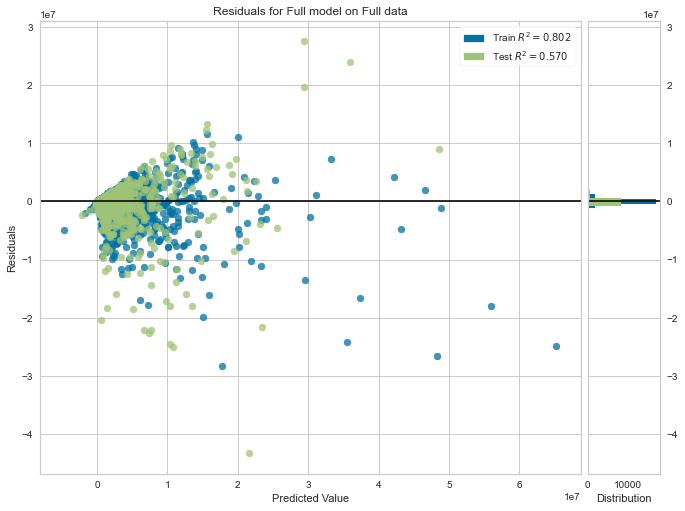

<AxesSubplot:title={'center':'Residuals for Full model on Full data'}, xlabel='Predicted Value', ylabel='Residuals'>

In [192]:
from yellowbrick.regressor import ResidualsPlot, PredictionError

# draw a residual plot
visualizer = ResidualsPlot(lgbm_all_data, size=(800, 600), 
                        title='Residuals for Full model on Full data')

visualizer.fit(X_train_all, y_train_all.values.reshape(-1,))  # Fit the training data to the visualizer
visualizer.score(X_test, y_test.values.reshape(-1,))  # Evaluate the model on the test data

# Finalize and render the figure
visualizer.show()

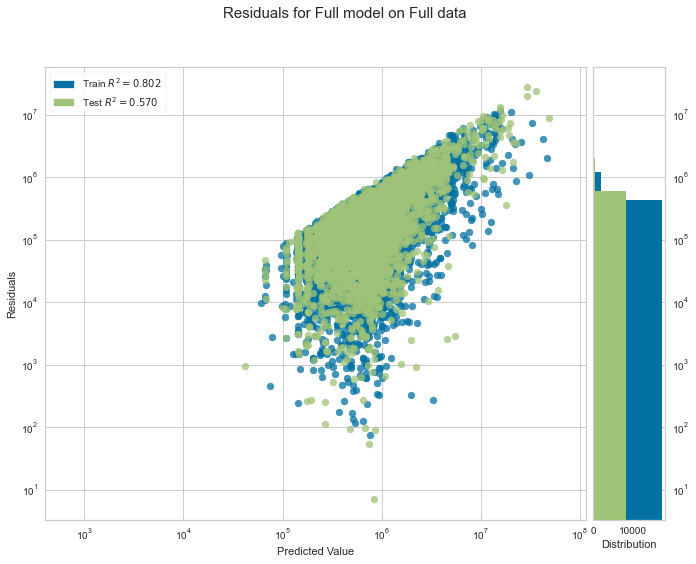

<AxesSubplot:title={'center':' '}, xlabel='Predicted Value', ylabel='Residuals'>

In [252]:
import matplotlib.pyplot as plt

# draw a residual plot using log scale
fig, ax = plt.subplots()
fig.suptitle('Residuals for Full model on Full data', fontsize=15)
visualizer = ResidualsPlot(lgbm_all_data, size=(800, 600), title=" ")

visualizer.fit(X_train_all, y_train_all.values.reshape(-1,))  # Fit the training data to the visualizer
visualizer.score(X_test, y_test.values.reshape(-1,))  # Evaluate the model on the test data
visualizer.ax.set_xscale('log')
visualizer.ax.set_yscale('log')
#visualizer.ax.set_title(label='Residuals for Full model on Full data', fontsize=15)

visualizer.show()

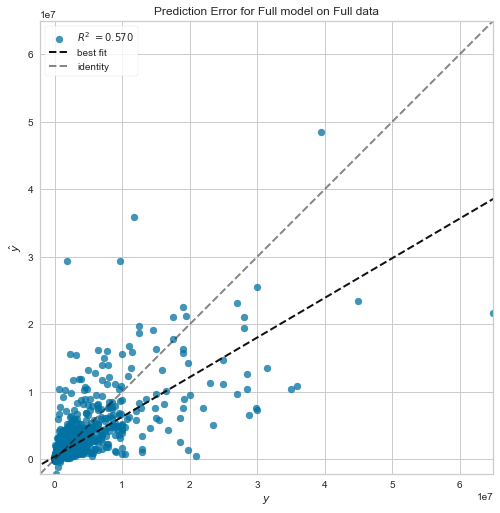

<AxesSubplot:title={'center':'Prediction Error for Full model on Full data'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [198]:
# draw a prediction error
visualizer = PredictionError(lgbm_all_data, size=(800, 600), 
                        title='Prediction Error for Full model on Full data')

visualizer.fit(X_train_all, y_train_all.values.reshape(-1,)) 
visualizer.score(X_test, y_test.values.reshape(-1,))  
visualizer.show()

### To CA

In [199]:
X_test_CA = X_test[X_test['state_CA'] == 1]
X_test_GA = X_test[X_test['state_GA'] == 1]

In [200]:
CA_score = lgbm_all_data.score(X_test_CA, y_test_CA)
CA_preds = lgbm_all_data.predict(X_test_CA)

print(
    " Validation to CA Data \n"
    f"- RMSE : {(rmse_score(y_test_CA, CA_preds))**0.5:.5f} \n"
    f"- Score : {CA_score:.5f} \n",
)

 Validation to CA Data 
- RMSE : 1571585.15555 
- Score : 0.55950 



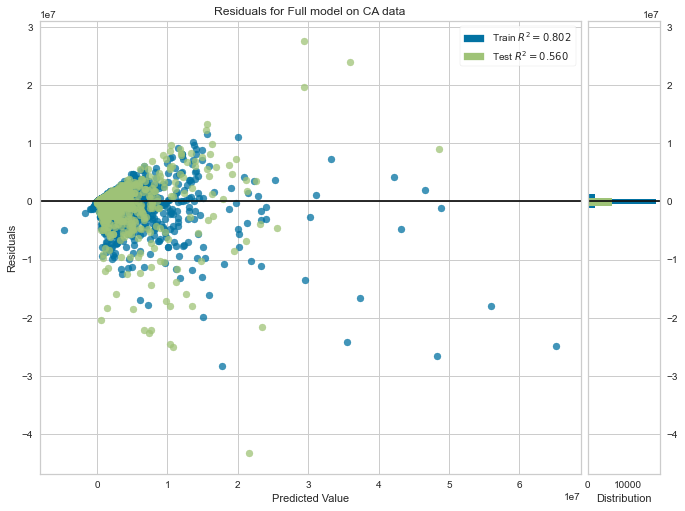

<AxesSubplot:title={'center':'Residuals for Full model on CA data'}, xlabel='Predicted Value', ylabel='Residuals'>

In [201]:
visualizer = ResidualsPlot(lgbm_all_data, size=(800, 600), 
                        title='Residuals for Full model on CA data')

visualizer.fit(X_train_all, y_train_all.values.reshape(-1,)) 
visualizer.score(X_test_CA, y_test_CA.values.reshape(-1,))  
visualizer.show()

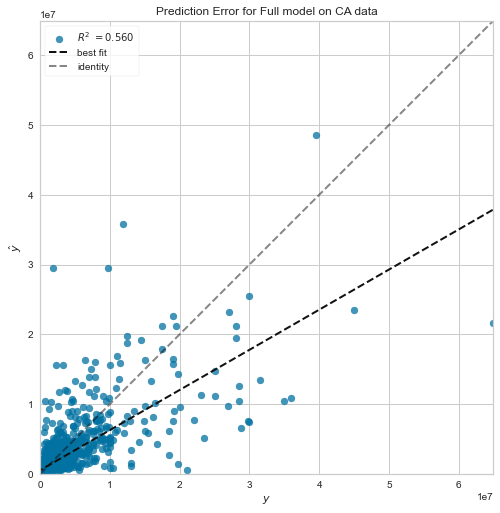

<AxesSubplot:title={'center':'Prediction Error for Full model on CA data'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [202]:
visualizer = PredictionError(lgbm_all_data, size=(800, 600), 
                        title='Prediction Error for Full model on CA data')

visualizer.fit(X_train_all, y_train_all.values.reshape(-1,)) 
visualizer.score(X_test_CA, y_test_CA.values.reshape(-1,))  
visualizer.show()

### To GA

In [203]:
GA_score = lgbm_all_data.score(X_test_GA, y_test_GA)
GA_preds = lgbm_all_data.predict(X_test_GA)

print(
    " Validation to GA Data \n"
    f"- RMSE : {(rmse_score(y_test_GA, GA_preds))**0.5:.5f} \n"
    f"- Score : {GA_score:.5f} \n",
)

 Validation to GA Data 
- RMSE : 385964.12429 
- Score : 0.30449 



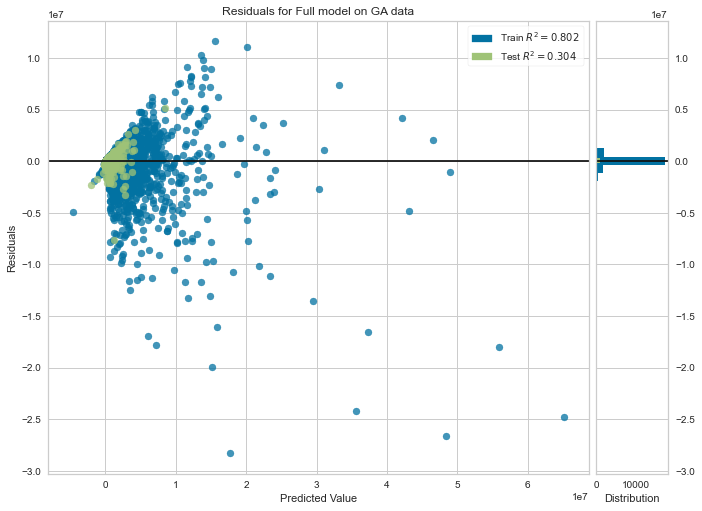

<AxesSubplot:title={'center':'Residuals for Full model on GA data'}, xlabel='Predicted Value', ylabel='Residuals'>

In [204]:
visualizer = ResidualsPlot(lgbm_all_data, size=(800, 600), 
                        title='Residuals for Full model on GA data')

visualizer.fit(X_train_all, y_train_all.values.reshape(-1,)) 
visualizer.score(X_test_GA, y_test_GA.values.reshape(-1,))  
visualizer.show()

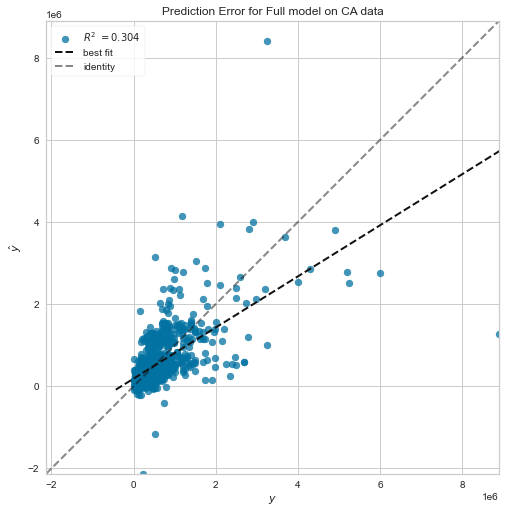

<AxesSubplot:title={'center':'Prediction Error for Full model on CA data'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [205]:
visualizer = PredictionError(lgbm_all_data, size=(800, 600), 
                        title='Prediction Error for Full model on CA data')

visualizer.fit(X_train_all, y_train_all.values.reshape(-1,)) 
visualizer.score(X_test_GA, y_test_GA.values.reshape(-1,))  
visualizer.show()

### To each HomeType

In [206]:
# merge x and y datasets to split data according to home type
merge_test = pd.merge(X_test, y_test, left_index=True, right_index=True)
merge_test

,yearBuilt,livingArea,bathrooms,bedrooms,parking,garageSpaces,hasGarage,pool,spa,isNewConstruction,...,county_Wheeler County,county_White County,county_Whitfield County,county_Wilcox County,county_Wilkes County,county_Wilkinson County,county_Worth County,county_Yolo County,county_Yuba County,price
0,0.989599,0.010547,0.203613,-0.344171,0,0.726645,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1599000.0
1,-0.426935,-0.029066,-1.262212,-1.167490,0,-0.894006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,749000.0
2,-0.115989,-0.016654,0.203613,-0.344171,0,-0.894006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1535000.0
3,0.471355,-0.021801,-0.529300,-1.167490,1,0.726645,1,0,0,0,...,0,0,0,0,0,0,0,0,0,470000.0
4,-0.496035,0.002142,0.203613,1.302468,1,0.726645,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1750000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9334,-0.772432,-0.030499,-1.262212,-1.167490,0,-0.894006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49999.0
9335,-0.185088,-0.010269,-0.529300,0.479148,1,0.726645,1,0,0,0,...,0,0,0,0,0,0,0,0,0,291700.0
9336,0.367706,-0.023169,0.203613,-0.344171,1,-0.894006,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2347315.0
9337,1.093248,-0.022094,-0.529300,-1.167490,1,-0.894006,1,0,0,0,...,0,0,0,0,0,0,0,0,0,287500.0


In [207]:
# there is no apartment
merge_test_apartment = merge_test[merge_test['homeType_APARTMENT'] == 1]
merge_test_apartment

,yearBuilt,livingArea,bathrooms,bedrooms,parking,garageSpaces,hasGarage,pool,spa,isNewConstruction,...,county_Wheeler County,county_White County,county_Whitfield County,county_Wilcox County,county_Wilkes County,county_Wilkinson County,county_Worth County,county_Yolo County,county_Yuba County,price


In [208]:
merge_test['homeType_APARTMENT'].unique()

array([0], dtype=int64)

In [209]:
merge_test_condo = merge_test[merge_test['homeType_CONDO'] == 1]
merge_test_condo

,yearBuilt,livingArea,bathrooms,bedrooms,parking,garageSpaces,hasGarage,pool,spa,isNewConstruction,...,county_Wheeler County,county_White County,county_Whitfield County,county_Wilcox County,county_Wilkes County,county_Wilkinson County,county_Worth County,county_Yolo County,county_Yuba County,price
2,-0.115989,-0.016654,0.203613,-0.344171,0,-0.894006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1535000.0
3,0.471355,-0.021801,-0.529300,-1.167490,1,0.726645,1,0,0,0,...,0,0,0,0,0,0,0,0,0,470000.0
31,0.885950,-0.022893,-0.529300,-1.167490,1,-0.083681,1,0,1,0,...,0,0,0,0,0,0,0,0,0,475000.0
32,-0.115989,-0.027388,-1.262212,-1.167490,1,-0.083681,1,0,1,0,...,0,0,0,0,0,0,0,0,0,275000.0
39,-0.046890,-0.019749,-0.529300,-0.344171,1,0.726645,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1399000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9169,-2.188966,-0.041445,-0.529300,-1.990809,0,-0.894006,0,0,1,0,...,0,0,0,0,0,0,0,0,0,215200.0
9222,0.298606,-0.041445,-0.529300,-0.344171,1,-0.894006,0,1,1,0,...,0,0,0,0,0,0,0,0,0,425000.0
9298,0.989599,-0.018055,-0.529300,-1.167490,1,-0.894006,0,0,1,0,...,0,0,0,0,0,0,0,0,0,389900.0
9305,1.093248,-0.019065,0.203613,-0.344171,0,0.726645,1,1,1,0,...,0,0,0,0,0,0,0,0,0,489000.0


In [210]:
merge_test_multi = merge_test[merge_test['homeType_MULTI_FAMILY'] == 1]
merge_test_multi

,yearBuilt,livingArea,bathrooms,bedrooms,parking,garageSpaces,hasGarage,pool,spa,isNewConstruction,...,county_Wheeler County,county_White County,county_Whitfield County,county_Wilcox County,county_Wilkes County,county_Wilkinson County,county_Worth County,county_Yolo County,county_Yuba County,price
74,-0.426935,0.014928,1.669438,3.772425,1,2.347297,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1750000.0
113,-0.599684,0.004487,0.936526,3.772425,1,-0.894006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1250000.0
125,-1.739821,-0.011963,-0.529300,0.479148,1,-0.894006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,249950.0
171,-0.392386,0.018756,0.936526,7.065701,1,-0.894006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,978000.0
245,-0.565134,0.016769,0.936526,6.242382,1,-0.894006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,998000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8684,-0.530584,-0.023658,-0.529300,0.479148,1,-0.894006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,39475.0
8784,-0.426935,-0.021085,-0.529300,0.479148,0,-0.894006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33000.0
8850,-1.601622,-0.000366,-0.529300,2.949106,0,-0.894006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,90000.0
9164,-1.048829,-0.002093,-0.529300,0.479148,0,-0.894006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,99500.0


In [211]:
merge_test_single = merge_test[merge_test['homeType_SINGLE_FAMILY'] == 1]
merge_test_single

,yearBuilt,livingArea,bathrooms,bedrooms,parking,garageSpaces,hasGarage,pool,spa,isNewConstruction,...,county_Wheeler County,county_White County,county_Whitfield County,county_Wilcox County,county_Wilkes County,county_Wilkinson County,county_Worth County,county_Yolo County,county_Yuba County,price
0,0.989599,0.010547,0.203613,-0.344171,0,0.726645,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1599000.0
1,-0.426935,-0.029066,-1.262212,-1.167490,0,-0.894006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,749000.0
4,-0.496035,0.002142,0.203613,1.302468,1,0.726645,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1750000.0
5,0.540454,-0.012827,-0.529300,-0.344171,1,0.726645,1,0,0,0,...,0,0,0,0,0,0,0,0,0,360000.0
6,-1.290676,-0.025613,-1.262212,-1.167490,1,-0.894006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,277900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,0.955049,0.041819,1.669438,0.479148,1,-0.894006,1,0,0,0,...,0,0,0,0,0,0,0,0,0,449000.0
9334,-0.772432,-0.030499,-1.262212,-1.167490,0,-0.894006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49999.0
9335,-0.185088,-0.010269,-0.529300,0.479148,1,0.726645,1,0,0,0,...,0,0,0,0,0,0,0,0,0,291700.0
9336,0.367706,-0.023169,0.203613,-0.344171,1,-0.894006,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2347315.0


In [212]:
merge_test_town = merge_test[merge_test['homeType_TOWNHOUSE'] == 1]
merge_test_town

,yearBuilt,livingArea,bathrooms,bedrooms,parking,garageSpaces,hasGarage,pool,spa,isNewConstruction,...,county_Wheeler County,county_White County,county_Whitfield County,county_Wilcox County,county_Wilkes County,county_Wilkinson County,county_Worth County,county_Yolo County,county_Yuba County,price
8,0.333156,-0.021313,-0.529300,-0.344171,1,-0.894006,0,0,1,0,...,0,0,0,0,0,0,0,0,0,469000.0
10,0.540454,-0.023007,0.203613,-1.167490,1,0.726645,1,0,0,0,...,0,0,0,0,0,0,0,0,0,595900.0
57,1.369645,-0.009732,0.936526,-0.344171,1,0.726645,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1399900.0
69,0.298606,-0.020286,0.203613,-0.344171,1,0.726645,1,0,1,0,...,0,0,0,0,0,0,0,0,0,525000.0
106,1.438744,0.000090,0.203613,-0.344171,1,0.726645,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1599824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9207,0.229507,-0.021899,0.203613,-1.167490,0,-0.894006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,201000.0
9215,0.713202,-0.019130,0.203613,-0.344171,1,-0.894006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,255000.0
9237,0.194958,-0.019554,-0.529300,-0.344171,1,-0.894006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,269900.0
9301,0.402255,-0.012468,-0.529300,-1.167490,1,-0.083681,1,0,1,0,...,0,0,0,0,0,0,0,0,0,130000.0


In [213]:
# split each x and y
y_test_condo = merge_test_condo[['price']]
X_test_condo = merge_test_condo.drop('price', axis=1)

y_test_multi = merge_test_multi[['price']]
X_test_multi = merge_test_multi.drop('price', axis=1)

y_test_single = merge_test_single[['price']]
X_test_single = merge_test_single.drop('price', axis=1)

y_test_town = merge_test_town[['price']]
X_test_town = merge_test_town.drop('price', axis=1)

In [214]:
condo_score = lgbm_all_data.score(X_test_condo, y_test_condo)
condo_preds = lgbm_all_data.predict(X_test_condo)

print(
    " Validation to Condo \n"
    f"- There are {int(y_test_condo.count())} observations. \n"
    f"- RMSE : {(rmse_score(y_test_condo, condo_preds))**0.5:.5f} \n"
    f"- Score : {condo_score:.5f} \n",
)

 Validation to Condo 
- There are 946 observations. 
- RMSE : 446290.04496 
- Score : 0.20794 



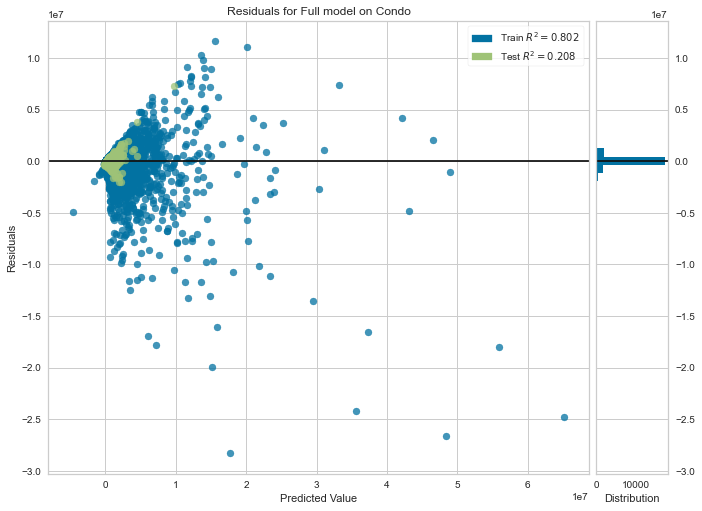

<AxesSubplot:title={'center':'Residuals for Full model on Condo'}, xlabel='Predicted Value', ylabel='Residuals'>

In [215]:
visualizer = ResidualsPlot(lgbm_all_data, size=(800, 600), 
                        title='Residuals for Full model on Condo')

visualizer.fit(X_train_all, y_train_all.values.reshape(-1,)) 
visualizer.score(X_test_condo, y_test_condo.values.reshape(-1,))  
visualizer.show()

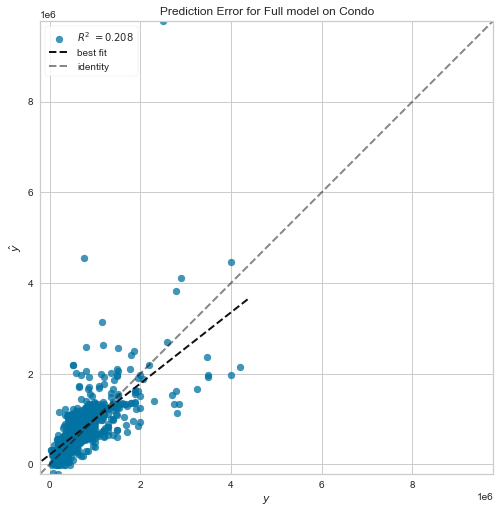

<AxesSubplot:title={'center':'Prediction Error for Full model on Condo'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [216]:
visualizer = PredictionError(lgbm_all_data, size=(800, 600), 
                        title='Prediction Error for Full model on Condo')

visualizer.fit(X_train_all, y_train_all.values.reshape(-1,)) 
visualizer.score(X_test_condo, y_test_condo.values.reshape(-1,))  
visualizer.show()

In [217]:
multi_score = lgbm_all_data.score(X_test_multi, y_test_multi)
multi_preds = lgbm_all_data.predict(X_test_multi)

print(
    " Validation to Multi Family \n"
    f"- There are {int(y_test_multi.count())} observations. \n"
    f"- RMSE : {(rmse_score(y_test_multi, multi_preds))**0.5:.5f} \n"
    f"- Score : {multi_score:.5f} \n",
)

 Validation to Multi Family 
- There are 146 observations. 
- RMSE : 1641942.25641 
- Score : -1.41472 



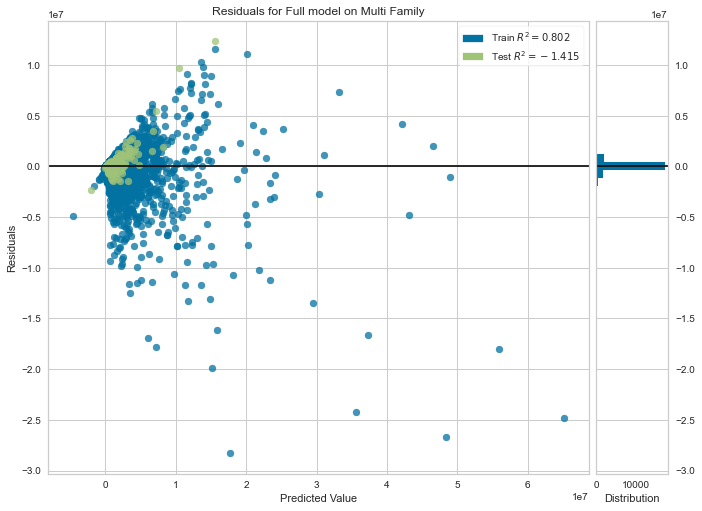

<AxesSubplot:title={'center':'Residuals for Full model on Multi Family'}, xlabel='Predicted Value', ylabel='Residuals'>

In [218]:
visualizer = ResidualsPlot(lgbm_all_data, size=(800, 600), 
                        title='Residuals for Full model on Multi Family')

visualizer.fit(X_train_all, y_train_all.values.reshape(-1,)) 
visualizer.score(X_test_multi, y_test_multi.values.reshape(-1,))  
visualizer.show()

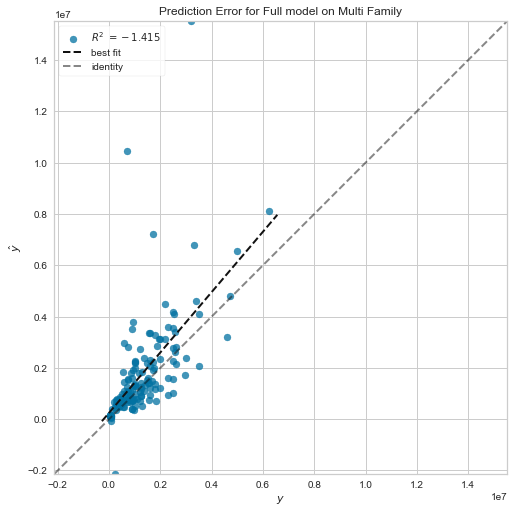

<AxesSubplot:title={'center':'Prediction Error for Full model on Multi Family'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [219]:
visualizer = PredictionError(lgbm_all_data, size=(800, 600), 
                        title='Prediction Error for Full model on Multi Family')

visualizer.fit(X_train_all, y_train_all.values.reshape(-1,)) 
visualizer.score(X_test_multi, y_test_multi.values.reshape(-1,))  
visualizer.show()

In [220]:
single_score = lgbm_all_data.score(X_test_single, y_test_single)
single_preds = lgbm_all_data.predict(X_test_single)

print(
    " Validation to Single Family \n"
    f"- There are {int(y_test_single.count())} observations. \n"
    f"- RMSE : {(rmse_score(y_test_single, single_preds))**0.5:.5f} \n"
    f"- Score : {single_score:.5f} \n",
)

 Validation to Single Family 
- There are 7836 observations. 
- RMSE : 1466703.03803 
- Score : 0.57844 



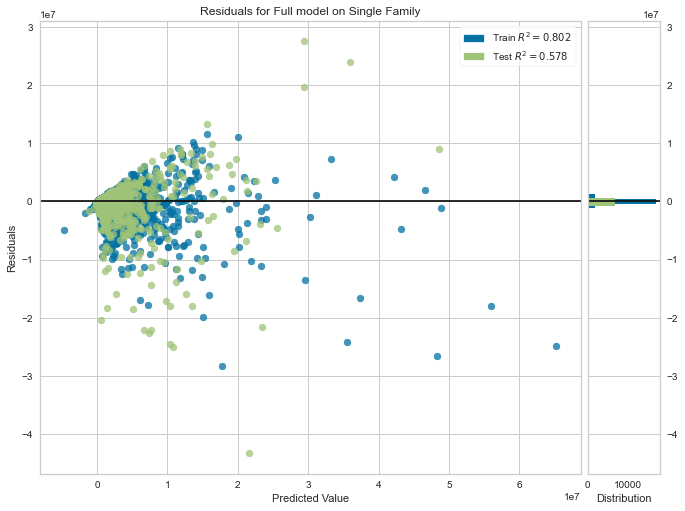

<AxesSubplot:title={'center':'Residuals for Full model on Single Family'}, xlabel='Predicted Value', ylabel='Residuals'>

In [221]:
visualizer = ResidualsPlot(lgbm_all_data, size=(800, 600), 
                        title='Residuals for Full model on Single Family')

visualizer.fit(X_train_all, y_train_all.values.reshape(-1,)) 
visualizer.score(X_test_single, y_test_single.values.reshape(-1,))  
visualizer.show()

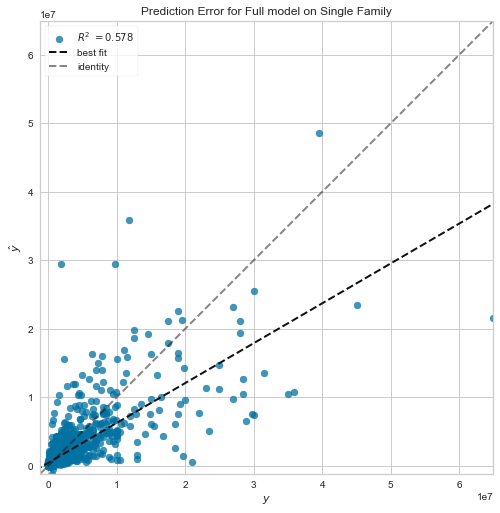

<AxesSubplot:title={'center':'Prediction Error for Full model on Single Family'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [222]:
visualizer = PredictionError(lgbm_all_data, size=(800, 600), 
                        title='Prediction Error for Full model on Single Family')

visualizer.fit(X_train_all, y_train_all.values.reshape(-1,)) 
visualizer.score(X_test_single, y_test_single.values.reshape(-1,))  
visualizer.show()

In [223]:
town_score = lgbm_all_data.score(X_test_town, y_test_town)
town_preds = lgbm_all_data.predict(X_test_town)

print(
    " Validation to Townhouse \n"
    f"- There are {int(y_test_town.count())} observations. \n"
    f"- RMSE : {(rmse_score(y_test_town, town_preds))**0.5:.5f} \n"
    f"- Score : {town_score:.5f} \n",
)

 Validation to Townhouse 
- There are 411 observations. 
- RMSE : 401729.51874 
- Score : 0.54518 



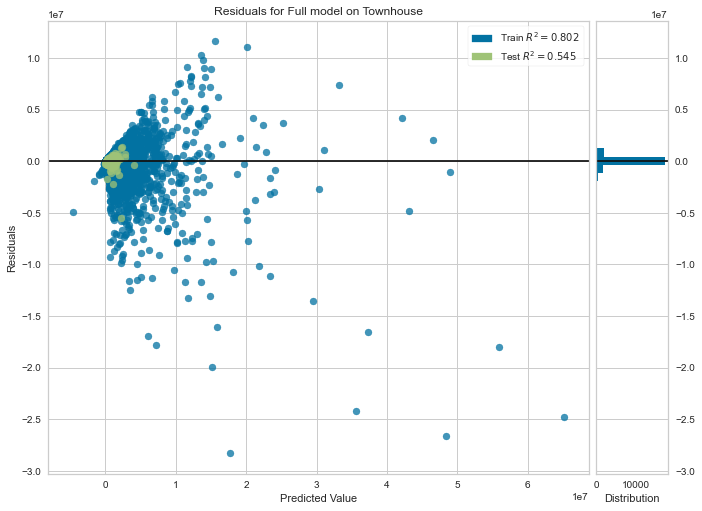

<AxesSubplot:title={'center':'Residuals for Full model on Townhouse'}, xlabel='Predicted Value', ylabel='Residuals'>

In [224]:
visualizer = ResidualsPlot(lgbm_all_data, size=(800, 600), 
                        title='Residuals for Full model on Townhouse')

visualizer.fit(X_train_all, y_train_all.values.reshape(-1,)) 
visualizer.score(X_test_town, y_test_town.values.reshape(-1,))  
visualizer.show()

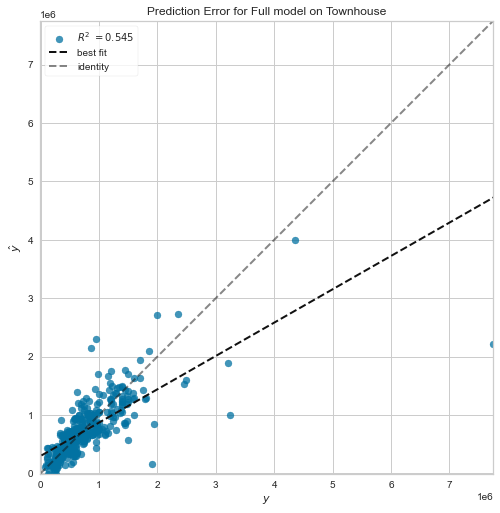

<AxesSubplot:title={'center':'Prediction Error for Full model on Townhouse'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [225]:
visualizer = PredictionError(lgbm_all_data, size=(800, 600), 
                        title='Prediction Error for Full model on Townhouse')

visualizer.fit(X_train_all, y_train_all.values.reshape(-1,)) 
visualizer.score(X_test_town, y_test_town.values.reshape(-1,))  
visualizer.show()